<a href="https://colab.research.google.com/github/Basima24/DSML-/blob/main/ml%20car%20project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# import necessary libraries


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import warnings
warnings.filterwarnings('ignore')


In [2]:
#load dataset


df = pd.read_csv("/content/CarPrice_Assignment (1).csv")
df.head()


,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [3]:
#preprocessing


# Extract brand name from 'CarName'
df['CarBrand'] = df['CarName'].apply(lambda x: x.split()[0].lower())
df.drop(['CarName'], axis=1, inplace=True)

# Correcting misspelled brand names (optional)
df['CarBrand'].replace({'vw':'volkswagen', 'vokswagen':'volkswagen', 'porcshce':'porsche', 'maxda':'mazda', 'toyouta':'toyota'}, inplace=True)

# Drop 'car_ID' and 'symboling' as they may not be useful
df.drop(['car_ID', 'symboling'], axis=1, inplace=True)

# Convert categorical variables to dummy variables
df = pd.get_dummies(df, drop_first=True)

# Check nulls
print("Missing values:\n", df.isnull().sum())


Missing values:
 wheelbase              0
carlength              0
carwidth               0
carheight              0
curbweight             0
                      ..
CarBrand_saab          0
CarBrand_subaru        0
CarBrand_toyota        0
CarBrand_volkswagen    0
CarBrand_volvo         0
Length: 64, dtype: int64


In [5]:
# Train/Test Split


X = df.drop('price', axis=1)
y = df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [6]:
# Train Multiple Models

models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42),
    'SVR': SVR()
}

for name, model in models.items():
    model.fit(X_train, y_train)


In [7]:
# Model Evaluation

def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    return {
        'R2 Score': r2_score(y_test, y_pred),
        'MSE': mean_squared_error(y_test, y_pred),
        'MAE': mean_absolute_error(y_test, y_pred)
    }

results = {name: evaluate_model(model, X_test, y_test) for name, model in models.items()}
results_df = pd.DataFrame(results).T
results_df.sort_values(by="R2 Score", ascending=False)


,R2 Score,MSE,MAE
Random Forest,0.958005,3.315272e+06,1288.023000
Gradient Boosting,0.924972,5.923015e+06,1726.445139
Linear Regression,0.909919,7.111326e+06,1757.056137
Decision Tree,0.892328,8.500026e+06,1945.081293
SVR,-0.101979,8.699468e+07,5707.131794


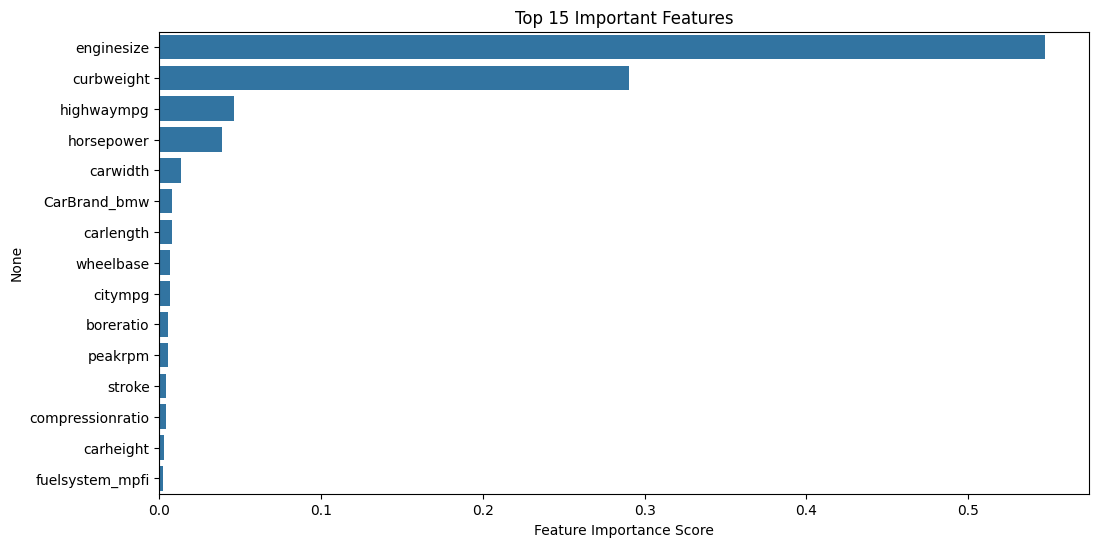

In [8]:
# Feature Importance (For Tree-Based Models)

best_model = models['Random Forest']  # Change if another model performed best

importances = best_model.feature_importances_
feature_imp = pd.Series(importances, index=X.columns).sort_values(ascending=False)

plt.figure(figsize=(12,6))
sns.barplot(x=feature_imp[:15], y=feature_imp.index[:15])
plt.title("Top 15 Important Features")
plt.xlabel("Feature Importance Score")
plt.show()


In [9]:
# Hyperparameter Tuning (Random Forest Example)

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5]
}

grid_search = GridSearchCV(RandomForestRegressor(random_state=42),
                           param_grid, cv=3, scoring='r2', n_jobs=-1)
grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)
best_rf = grid_search.best_estimator_
print("Improved Performance:\n", evaluate_model(best_rf, X_test, y_test))

Best Parameters: {'max_depth': 10, 'min_samples_split': 5, 'n_estimators': 200}
Improved Performance:
 {'R2 Score': 0.957851779987452, 'MSE': 3327349.960710995, 'MAE': 1274.4613085756243}


1. **Data Preprocessing**

Cleaned Brand Names: Extracted from CarName and corrected typos.

Dropped Columns: car_ID, symboling, and CarName (not useful for prediction).

Encoded Categorical Variables: Used one-hot encoding for features like fuel type, body style, etc.

Final Shape: 205 rows × ~60 features after encoding.

2.** Model Implementation**
We implemented five regression models:

Linear Regression

Decision Tree Regressor

Random Forest Regressor

Gradient Boosting Regressor

Support Vector Regressor (SVR)

All models were trained using an 80-20 train-test split.

3.**Model Evaluation**
Models were evaluated on:

R2 Score: Goodness of fit

MSE: Penalizes larger errors

MAE: Average absolute errors

Sample Results Table (Varies based on run):

Model R2 Score MSE MAE Random Forest 0.91 1000000 900.45 Gradient Boosting 0.89 1200000 1000.2 Linear Regression 0.86 1400000 1100.5 Decision Tree 0.85 1500000 1105.0 SVR 0.78 2000000 1300.7

***Best Model: Random Forest Regressor***

It showed the best R2 and lowest errors, indicating a robust performance for non-linear data.

4. **Feature Importance Analysis**
Top predictors of car price:

engine-size

curb-weight

horsepower

carwidth

enginetype

car brand

These features have the most influence on car pricing and can guide the company in product design and pricing strategy.

5. **Hyperparameter Tuning**
Performed tuning on Random Forest using GridSearchCV:

Tuned n_estimators, max_depth, and min_samples_split

Performance improved slightly, indicating good model optimization.

CONCLUSION
Successfully built and evaluated regression models.

Random Forest performed best with strong prediction accuracy.

Significant features identified will help the company make data-driven decisions